In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from cvxopt import matrix,solvers
from scipy.optimize import minimize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

In [ ]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X.isnull().sum()

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [ ]:
y.isnull().sum()

np.int64(0)

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [ ]:
print(y.value_counts())

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

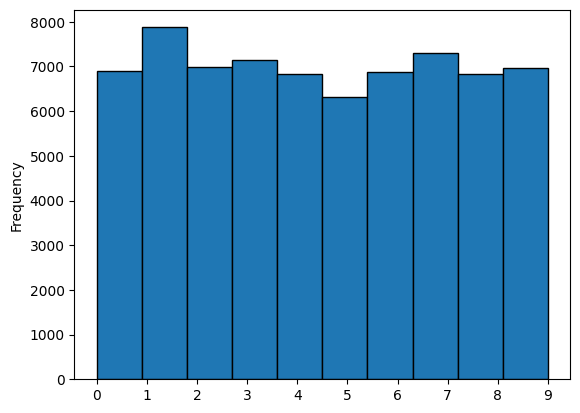

In [ ]:
y = y.astype('int')
y.plot(kind="hist",edgecolor='black',xticks=range(10))

In [ ]:
X = X / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_train_scaled)
X_train_reduced = pca.transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [ ]:
X_test_reduced.shape

(14000, 330)

# SKlearn models


Logistic Regression Accuracy: 0.9222
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.91      0.91      1380
           3       0.91      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.89      0.89      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



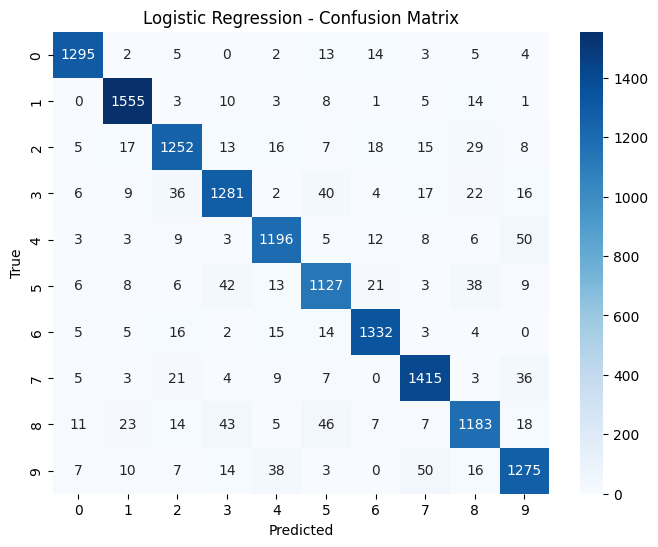

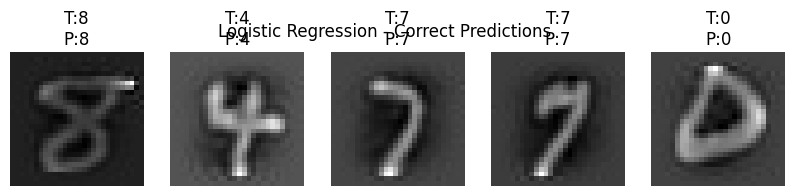

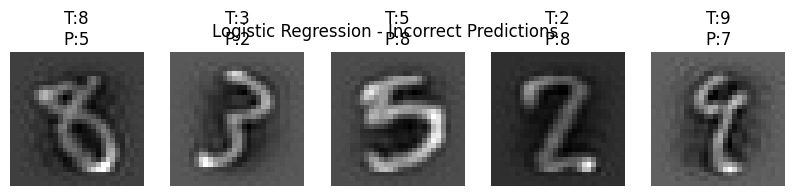

In [ ]:
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_reduced, y_train)

y_pred_logreg = logreg.predict(X_test_reduced)

acc_sk_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {acc_sk_logreg:.4f}")
print(classification_report(y_test, y_pred_logreg))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

correct_idx = np.where(y_pred_logreg == y_test)[0][:5]
incorrect_idx = np.where(y_pred_logreg != y_test)[0][:5]

plt.figure(figsize=(10, 2))
for i, idx in enumerate(correct_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred_logreg[idx]}")
    plt.axis("off")
plt.suptitle("Logistic Regression - Correct Predictions")
plt.show()

plt.figure(figsize=(10, 2))
for i, idx in enumerate(incorrect_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred_logreg[idx]}")
    plt.axis("off")
plt.suptitle("Logistic Regression - Incorrect Predictions")
plt.show()

SVM Accuracy: 0.9644
SVM train accuracy: 0.9855
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.93      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



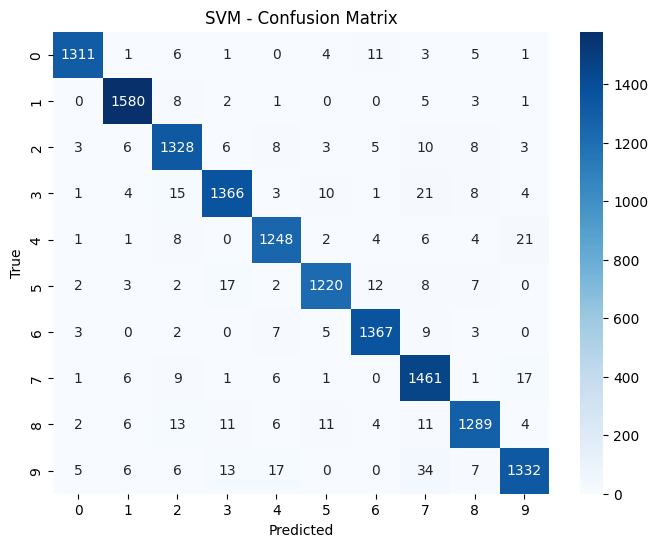

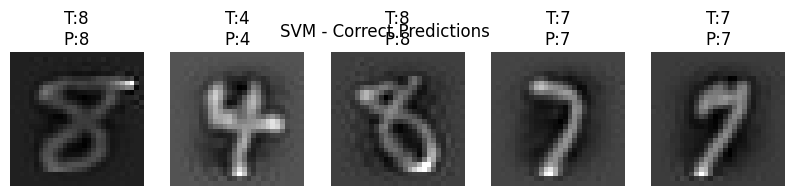

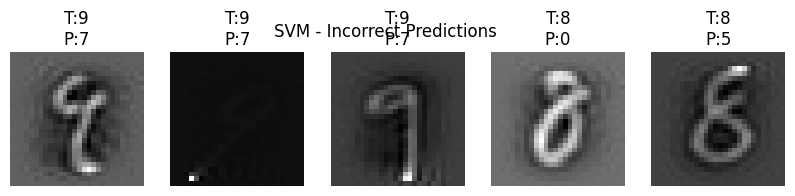

In [ ]:

svm_model = SVC()
svm_model.fit(X_train_reduced, y_train)
y_pred_svm = svm_model.predict(X_test_reduced)

acc_sk_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_sk_svm:.4f}")
y_train_pred_svm = svm_model.predict(X_train_reduced)
train_acc_svm = accuracy_score(y_train,y_train_pred_svm)
print(f"SVM train accuracy: {train_acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

correct_idx = np.where(y_pred_svm == y_test.values)[0][:5]
incorrect_idx = np.where(y_pred_svm != y_test.values)[0][:5]

plt.figure(figsize=(10, 2))
for i, idx in enumerate(correct_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.values[idx]}\nP:{y_pred_svm[idx]}")
    plt.axis("off")
plt.suptitle("SVM - Correct Predictions\n")
plt.show()

plt.figure(figsize=(10, 2))
for i, idx in enumerate(incorrect_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.values[idx]}\nP:{y_pred_svm[idx]}")
    plt.axis("off")
plt.suptitle("SVM - Incorrect Predictions")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

QDA Accuracy: 0.7535714285714286
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1343
           1       0.97      0.94      0.95      1600
           2       0.88      0.65      0.75      1380
           3       0.77      0.61      0.68      1433
           4       0.91      0.64      0.75      1295
           5       0.95      0.48      0.64      1273
           6       0.95      0.92      0.94      1396
           7       0.94      0.48      0.64      1503
           8       0.48      0.89      0.62      1357
           9       0.55      0.93      0.69      1420

    accuracy                           0.75     14000
   macro avg       0.82      0.75      0.75     14000
weighted avg       0.82      0.75      0.75     14000



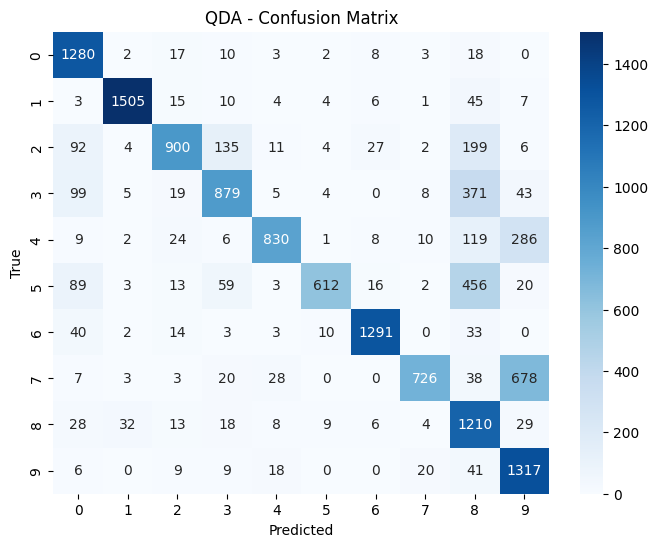

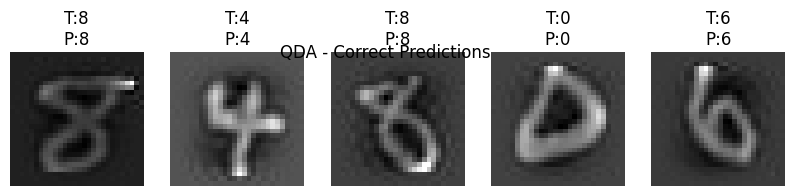

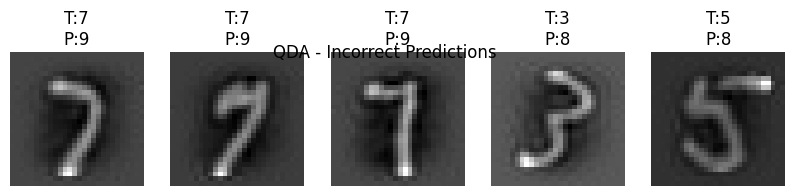

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_reduced,y_train)
y_pred_qda = qda.predict(X_test_reduced)
acc_sk_qda = accuracy_score(y_test, y_pred_qda)
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))
cm_qda = confusion_matrix(y_test, y_pred_qda)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda, annot=True, fmt='d', cmap='Blues')
plt.title("QDA - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

correct_idx = np.where(y_pred_qda == y_test.values)[0][:5]
incorrect_idx = np.where(y_pred_qda != y_test.values)[0][:5]

plt.figure(figsize=(10, 2))
for i, idx in enumerate(correct_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred_qda[idx]}")
    plt.axis("off")
plt.suptitle("\nQDA - Correct Predictions")
plt.show()

plt.figure(figsize=(10, 2))
for i, idx in enumerate(incorrect_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred_qda[idx]}")
    plt.axis("off")
plt.suptitle("\nQDA - Incorrect Predictions")
plt.show()

Random Forest Accuracy: 0.9368
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.98      0.98      0.98      1600
           2       0.91      0.94      0.93      1380
           3       0.90      0.93      0.92      1433
           4       0.93      0.95      0.94      1295
           5       0.94      0.90      0.92      1273
           6       0.96      0.96      0.96      1396
           7       0.94      0.94      0.94      1503
           8       0.92      0.89      0.91      1357
           9       0.92      0.91      0.91      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



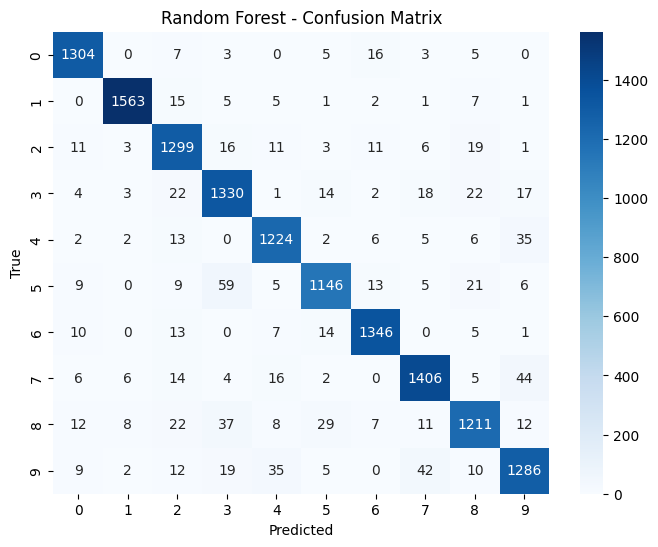

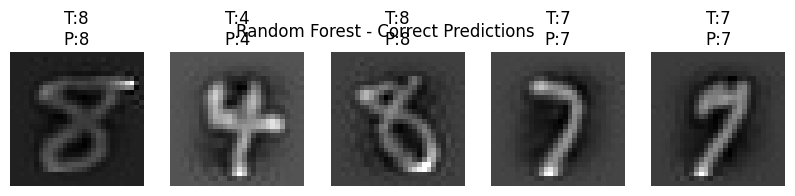

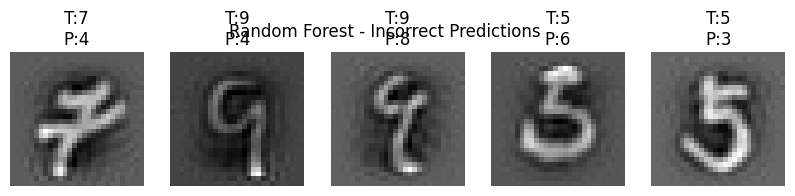

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_reduced, y_train)

y_pred_rf = rf_model.predict(X_test_reduced)

acc_sk_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_sk_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

correct_idx = np.where(y_pred_rf == y_test.values)[0][:5]
plt.figure(figsize=(10, 2))
for i, idx in enumerate(correct_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred_rf[idx]}")
    plt.axis("off")
plt.suptitle("Random Forest - Correct Predictions")
plt.show()

incorrect_idx = np.where(y_pred_rf != y_test.values)[0][:5]
plt.figure(figsize=(10, 2))
for i, idx in enumerate(incorrect_idx):
    img = pca.inverse_transform(X_test_reduced[idx]).reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"T:{y_test.iloc[idx]}\nP:{y_pred_rf[idx]}")
    plt.axis("off")
plt.suptitle("Random Forest - Incorrect Predictions")
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.76887489 0.83660703 0.87048208 0.79973216        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
  warnings.warn(


Best parameters from GridSearchCV: {'priors': None, 'reg_param': 0.5}
Best cross-validation score: 0.8704820802734247
QDA (with GridSearch) Accuracy: 0.8676
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1343
           1       0.92      0.98      0.95      1600
           2       0.92      0.79      0.85      1380
           3       0.91      0.83      0.87      1433
           4       0.93      0.91      0.92      1295
           5       0.94      0.81      0.87      1273
           6       0.96      0.92      0.94      1396
           7       0.95      0.64      0.77      1503
           8       0.72      0.90      0.80      1357
           9       0.70      0.92      0.79      1420

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.87     14000



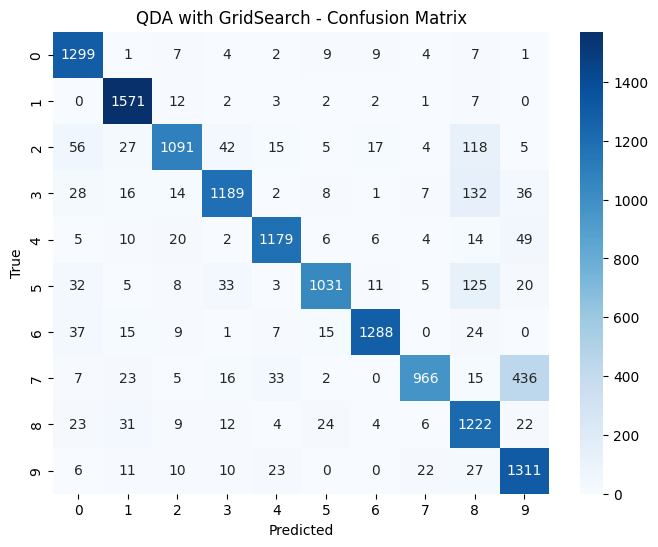

In [ ]:
param_grid = {
    'priors': [None, [0.1, 0.9], [0.5, 0.5], [0.9, 0.1]],
    'reg_param': [0.0, 0.1, 0.5, 1.0],
}

qda = QuadraticDiscriminantAnalysis()

grid_search = GridSearchCV(qda, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_reduced, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

y_pred_qda_grid = grid_search.best_estimator_.predict(X_test_reduced)

acc_qda_grid = accuracy_score(y_test, y_pred_qda_grid)
print(f"QDA (with GridSearch) Accuracy: {acc_qda_grid:.4f}")
print(classification_report(y_test, y_pred_qda_grid))

cm_qda_grid = confusion_matrix(y_test, y_pred_qda_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda_grid, annot=True, fmt='d', cmap='Blues')
plt.title("QDA with GridSearch - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Models from scratch


In [ ]:
class CustomLinearRegression:  # հետևիր կոդի սթային, դատարկ տողեր թող ֆունկցիաների արանքներում
  def __init__(self,learning_rate=0.1,n_iters=1000):
    self.learning_rate = learning_rate
    self.weights = None
    self.bias = None
    self.n_iters = n_iters
  def sigmoid(self,z):
    return 1 / (1+np.exp(-z))
  def compute_loss(self,y_pred,y_train):
    epsilon = 1e-7
    return -np.mean(y_train*np.log(y_pred+epsilon) + (1-y_train) * np.log(1-y_pred+epsilon))
  def fit(self,X,y):
    m,n = X.shape
    self.weights = np.zeros(n)
    self.bias = 0
    for i in range(self.n_iters):
      y_pred = self.sigmoid(np.dot(X,self.weights) + self.bias)
      dw = 1/m * (np.dot(X.T , (y_pred - y)))
      loss = self.compute_loss(y_pred,y)
      if np.linalg.norm(dw) < 1e-9:
        break
      self.weights -= self.learning_rate*dw
  def predict(self, X):
      threshold = 0.5
      y_hat = np.dot(X, self.weights) + self.bias
      y_predicted = self.sigmoid(y_hat)
      y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
      return np.array(y_predicted_cls)

In [ ]:
class OneVsAllLogisticRegression:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.classifiers = {}

    def fit(self, X, y):
        self.unique_classes = np.unique(y)

        for cls in self.unique_classes:
            print(f"Training classifier for class {cls}...")
            binary_y = (y == cls).astype(int)
            clf = CustomLinearRegression(learning_rate=self.learning_rate, n_iters=self.n_iters)
            clf.fit(X, binary_y)
            self.classifiers[cls] = clf

    def predict(self, X):
        probs = np.zeros((X.shape[0], len(self.classifiers)))

        for idx, cls in enumerate(self.classifiers):
            clf = self.classifiers[cls]
            probs[:, idx] = clf.sigmoid(np.dot(X, clf.weights) + clf.bias)

        return np.argmax(probs, axis=1)

In [ ]:
ova_model = OneVsAllLogisticRegression(learning_rate=0.1, n_iters=1000)

ova_model.fit(X_train_reduced, y_train)

y_pred_ova1 = ova_model.predict(X_test_reduced)

from sklearn.metrics import accuracy_score, classification_report
print("One-vs-All Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_ova1))
print(classification_report(y_test, y_pred_ova1))

Training classifier for class 0...
Training classifier for class 1...
Training classifier for class 2...
Training classifier for class 3...
Training classifier for class 4...
Training classifier for class 5...
Training classifier for class 6...
Training classifier for class 7...
Training classifier for class 8...
Training classifier for class 9...
One-vs-All Logistic Regression Accuracy: 0.8109285714285714
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1343
           1       0.75      0.97      0.84      1600
           2       0.87      0.76      0.81      1380
           3       0.79      0.82      0.80      1433
           4       0.78      0.86      0.82      1295
           5       0.81      0.66      0.73      1273
           6       0.93      0.83      0.88      1396
           7       0.87      0.79      0.83      1503
           8       0.79      0.69      0.73      1357
           9       0.80      0.76      0.78      

In [ ]:
class QDAClassifier:
    def __init__(self):
        self.classes = None
        self.means = {}
        self.covariances = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_c = X[y == cls]
            self.means[cls] = np.mean(X_c, axis=0)
            self.covariances[cls] = np.cov(X_c, rowvar=False) + 1e-6 * np.identity(X.shape[1])
            self.priors[cls] = X_c.shape[0] / X.shape[0]

    def log_likelihood(self, X, mean, cov):
        inv_cov = np.linalg.pinv(cov)
        det_cov = np.linalg.det(cov)
        term1 = -0.5 * np.log(det_cov + 1e-10)
        diff = X - mean
        term2 = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
        return term1 + term2

    def predict(self, X):
        likelihoods = []
        for cls in self.classes:
            mean = self.means[cls]
            cov = self.covariances[cls]
            prior = np.log(self.priors[cls])
            log_likelihood = self.log_likelihood(X, mean, cov) + prior
            likelihoods.append(log_likelihood)
        likelihoods = np.array(likelihoods).T
        return self.classes[np.argmax(likelihoods, axis=1)]

    def score(self, X, y):
        return np.mean(self.predict(X) == y)


In [ ]:
qda_model = QDAClassifier()
qda_model.fit(X_train_reduced, y_train)

y_pred_qda = qda_model.predict(X_test_reduced)

print("Custom QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))


Custom QDA Accuracy: 0.8715714285714286
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1343
           1       1.00      0.68      0.81      1600
           2       0.73      0.96      0.83      1380
           3       0.88      0.86      0.87      1433
           4       0.85      0.91      0.88      1295
           5       0.92      0.88      0.90      1273
           6       0.98      0.91      0.94      1396
           7       0.93      0.91      0.92      1503
           8       0.66      0.89      0.76      1357
           9       0.96      0.83      0.89      1420

    accuracy                           0.87     14000
   macro avg       0.89      0.87      0.87     14000
weighted avg       0.89      0.87      0.87     14000



In [ ]:
class CustomSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.alpha = None
        self.w = None
        self.t = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.astype(float).reshape(-1, 1)
        K = np.dot(X, X.T)

        P = matrix(np.outer(y, y) * K)
        q = matrix(-np.ones((n_samples, 1)))
        G_std = np.vstack([-np.eye(n_samples), np.eye(n_samples)])
        h_std = np.hstack([np.zeros(n_samples), np.ones(n_samples) * self.C])
        A = matrix(y.T)
        b = matrix(np.zeros(1))

        G = matrix(G_std)
        h = matrix(h_std)

        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)

        self.alpha = np.array(solution['x'])
        support_vector_mask = self.alpha > 1e-5
        self.alpha = self.alpha[support_vector_mask.flatten()]
        self.support_vectors = X[support_vector_mask.flatten()]
        self.support_vector_labels = y[support_vector_mask.flatten()]

        self.w = np.sum(self.alpha * self.support_vector_labels * self.support_vectors, axis=0)
        self.t = np.mean(self.support_vector_labels - np.dot(self.support_vectors, self.w.reshape(-1, 1)))

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.t).astype(int)

In [ ]:
class OneVsAllSVM:
    def __init__(self, C=1.0):
        self.C = C
        self.classifiers = []
        self.num_classes = 0

    def fit(self, X, y):
        self.num_classes = len(np.unique(y))
        self.classifiers = []

        for i in range(self.num_classes):
            print(f"Training class {i} vs all")
            y_binary = np.where(y == i, 1, -1)
            clf = CustomSVM(C=self.C)
            clf.fit(X, y_binary)
            self.classifiers.append(clf)

    def predict(self, X):
        decision_scores = np.array([
            clf.w @ X.T - clf.t for clf in self.classifiers
        ])
        return np.argmax(decision_scores, axis=0)


In [ ]:
ova_model = OneVsAllSVM(C=1.0)
ova_model.fit(X_train_reduced[:4000], y_train[:4000])

y_pred_ova = ova_model.predict(X_test_reduced[:1000])

print("One-vs-All SVM Accuracy:", accuracy_score(y_test[:1000], y_pred_ova))
print(classification_report(y_test[:1000], y_pred_ova))


Training class 0 vs all
Training class 1 vs all
Training class 2 vs all
Training class 3 vs all
Training class 4 vs all
Training class 5 vs all
Training class 6 vs all
Training class 7 vs all
Training class 8 vs all
Training class 9 vs all
One-vs-All SVM Accuracy: 0.602
              precision    recall  f1-score   support

           0       0.72      0.91      0.80        95
           1       0.82      0.63      0.72       104
           2       0.88      0.62      0.73        95
           3       0.96      0.58      0.72       119
           4       0.36      0.89      0.51        88
           5       0.97      0.33      0.50        90
           6       0.47      0.97      0.63        97
           7       0.51      0.93      0.66       103
           8       1.00      0.23      0.37       101
           9       1.00      0.01      0.02       108

    accuracy                           0.60      1000
   macro avg       0.77      0.61      0.57      1000
weighted avg       0.78  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class CustomRandomForest:
    def __init__(self, n_estimators=10, max_features='sqrt', max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(
                max_features=self.max_features,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        predictions = predictions.T
        final_preds = np.zeros(predictions.shape[0], dtype=int)
        for i in range(predictions.shape[0]):
            values, counts = np.unique(predictions[i], return_counts=True)
            final_preds[i] = values[np.argmax(counts)]
        return final_preds


In [ ]:
forest = CustomRandomForest(n_estimators=10, max_depth=10)
y_train_np = y_train.to_numpy().ravel()
forest.fit(X_train_reduced, y_train_np)

y_pred_rf = forest.predict(X_test_reduced)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Accuracy: 0.8460714285714286


# Comparing performances


In [ ]:
acc_lr =  accuracy_score(y_test, y_pred_ova1)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_qda =  accuracy_score(y_test, y_pred_qda)
acc_svm = accuracy_score(y_test[:1000], y_pred_ova)
df_acc = pd.DataFrame([[acc_lr],[acc_sk_logreg],[acc_rf],[acc_sk_rf],[acc_qda],[acc_sk_qda],[acc_qda_grid],[acc_svm],[acc_sk_svm]], columns=['Accuracy'],index=['Custom logistic','Sklearn logistic','Custom random forest','Sklearn random forest','Custom qda','Sklearn qda','qda grid search','Custom svm','Sklearn svm'])
df_acc

,Accuracy
Custom logistic,0.810929
Sklearn logistic,0.921643
Custom random forest,0.846071
Sklearn random forest,0.936786
Custom qda,0.871571
Sklearn qda,0.753571
qda grid search,0.867643
Custom svm,0.602000
Sklearn svm,0.964429


Ունենք 70000 նկար,ամեն մեկը 784 ֆիչրներով,քանի որ ամեն նկար 28*28 չափի է
Տվայլները բաժանել եմ 255-ի վրա որպեսզի նորմավորեմ [0,1] հատվածի վրա,ամեն պիքսել կարող էր ստանալ 0-ից մինչև 255 արժեք,բաժանելով train test հատվածների,օգտագործել եմ standardsclaer, pca(n_components=0.95) թողնելով որ ալգորիթմը ինքը ընտրի principal components այնքան, որ ապահովվի տվյալների 95% ցրվածության մեկնաբանելիությունը:Լավագույն accuracy տվեց Sklearn-ի SVM մոդելը,իմ կարծիքով նրա պատճառով որ մեր տվայլները գծորեն անջատելի չէին և svm by default օգտագործում է rbf(Gaussian) kernel-ը

